In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns   
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
base_dados = pd.read_csv('agricultural_raw_material.csv')

base_dados.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [4]:
base_dados.info() #obter o tipo de dado de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [5]:
#checar se existem valores nulos
base_dados.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [6]:
base_dados = base_dados.replace('%', '', regex=True) #remover o % da coluna de preços
base_dados = base_dados.replace(',', '', regex=True) #remover a , da coluna de preços
base_dados = base_dados.replace('-', '', regex=True) #remover o - da coluna de preços
base_dados = base_dados.replace('', np.nan) #transformar os valores vazios em NaN
base_dados = base_dados.replace('MAY90', np.nan) #transformar os valores vazios em NaN
#deletar as linhas que possuem valores nulos
base_dados = base_dados.dropna()
#verificar se ainda existem valores nulos
base_dados.isnull().sum()
#converter os tipos de dados para float

lista = [
    'Coarse wool Price',
    'Coarse wool price % Change',
    'Copra Price',
    'Copra price % Change',
    'Fine wool Price',
    'Fine wool price % Change',
    'Hard log price % Change',
    'Hard sawnwood price % Change',
    'Plywood price % Change',
    'Softlog price % Change',
    'Soft sawnwood price % Change',
    'Wood pulp price % Change',
    'Cotton price % Change',
    'Hide price % change',
    'Rubber price % Change'
]


base_dados[lista] = base_dados[lista].astype('float') #converter os tipos de dados para float
base_dados.dtypes #verificar os tipos de dados

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [7]:
base_dados.head() #verificar os dados

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [8]:
base_dados.Month = pd.to_datetime(base_dados.Month.str.upper(), format='%b%y', yearfirst=False) #converter a coluna Month para datetime
base_dados = base_dados.set_index('Month') #definir a coluna Month como index

base_dados.head() #verificar os dados

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [9]:
def renomear_colunas_para_portugues(base_dados):
    novo_nome_colunas = {
        'Coarse wool Price': 'Preço da lã grossa',
        'Coarse wool price % Change': '% Variação do preço da lã grossa',
        'Copra Price': 'Preço da copra',
        'Copra price % Change': '% Variação do preço da copra',
        'Cotton Price': 'Preço do algodão',
        'Cotton price % Change': '% Variação do preço do algodão',
        'Fine wool Price': 'Preço da lã fina',
        'Fine wool price % Change': '% Variação do preço da lã fina',
        'Hard log Price': 'Preço da tora bruta',
        'Hard log price % Change': '% Variação do preço da tora bruta',
        'Hard sawnwood Price': 'Preço da madeira serrada dura',
        'Hard sawnwood price % Change': '% Variação do preço da madeira serrada dura',
        'Hide Price': 'Preço do couro',
        'Hide price % change': '% Variação do preço do couro',
        'Plywood Price': 'Preço do compensado',
        'Plywood price % Change': '% Variação do preço do compensado',
        'Rubber Price': 'Preço da borracha',
        'Rubber price % Change': '% Variação do preço da borracha',
        'Softlog Price': 'Preço da tora macia',
        'Softlog price % Change': '% Variação do preço da tora macia',
        'Soft sawnwood Price': 'Preço da madeira serrada macia',
        'Soft sawnwood price % Change': '% Variação do preço da madeira serrada macia',
        'Wood pulp Price': 'Preço da celulose',
        'Wood pulp price % Change': '% Variação do preço da celulose',
    }
    
    return base_dados.rename(columns=novo_nome_colunas)

base_dados = renomear_colunas_para_portugues(base_dados) #renomear as colunas para português
#verificar os dados     
base_dados.head() #verificar os dados


,Preço da lã grossa,% Variação do preço da lã grossa,Preço da copra,% Variação do preço da copra,Preço do algodão,% Variação do preço do algodão,Preço da lã fina,% Variação do preço da lã fina,Preço da tora bruta,% Variação do preço da tora bruta,...,Preço do compensado,% Variação do preço do compensado,Preço da borracha,% Variação do preço da borracha,Preço da tora macia,% Variação do preço da tora macia,Preço da madeira serrada macia,% Variação do preço da madeira serrada macia,Preço da celulose,% Variação do preço da celulose
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


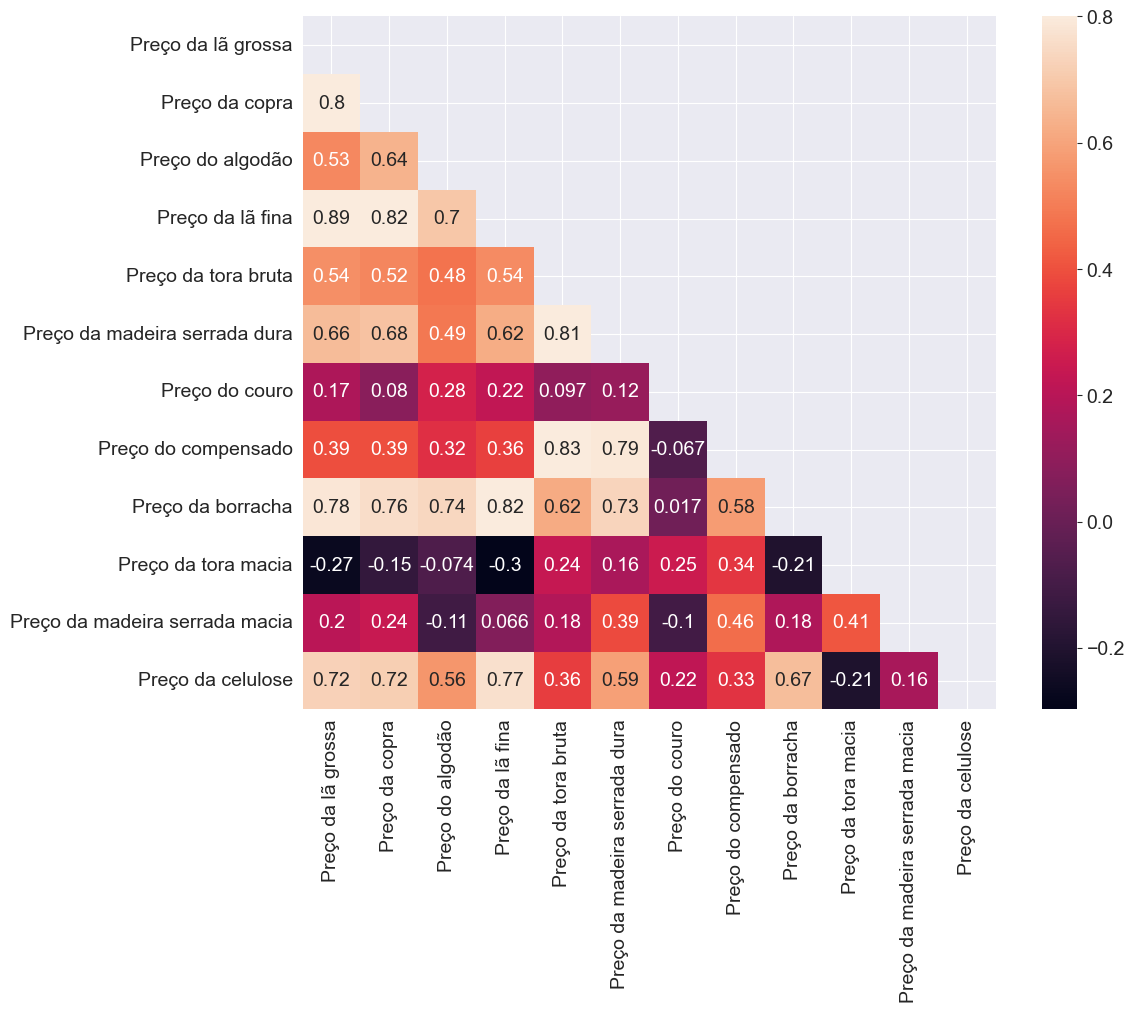

In [10]:
#lista de materia prima
lista_dados = [
    'Preço da lã grossa',
    'Preço da copra',
    'Preço do algodão',
    'Preço da lã fina',
    'Preço da tora bruta',
    'Preço da madeira serrada dura',
    'Preço do couro',
    'Preço do compensado',
    'Preço da borracha',
    'Preço da tora macia',
    'Preço da madeira serrada macia',
    'Preço da celulose'
]


#obter a correlação matrix
corrmat = base_dados[lista_dados].corr() 
#configura o tamanho da figura
plt.figure(figsize=(12, 9))

mask = np.triu(np.ones_like(corrmat, dtype=bool)) #cria uma máscara para a parte superior da matriz
sns.heatmap(corrmat, vmax= .8, mask=mask, square= True, annot = True)
plt.show()

#O preço da lã fina tem uma correlação positiva forte com o preço da lã grossa.
#O preço do compensado tem uma correlação positiva forte com o preço da tora bruta.
#O preço da madeira serrada macia quase não tem correlação com o preço da lã grossa.
#O preço da tora macia tem uma relação negativa moderada com o preço da lã grossa.

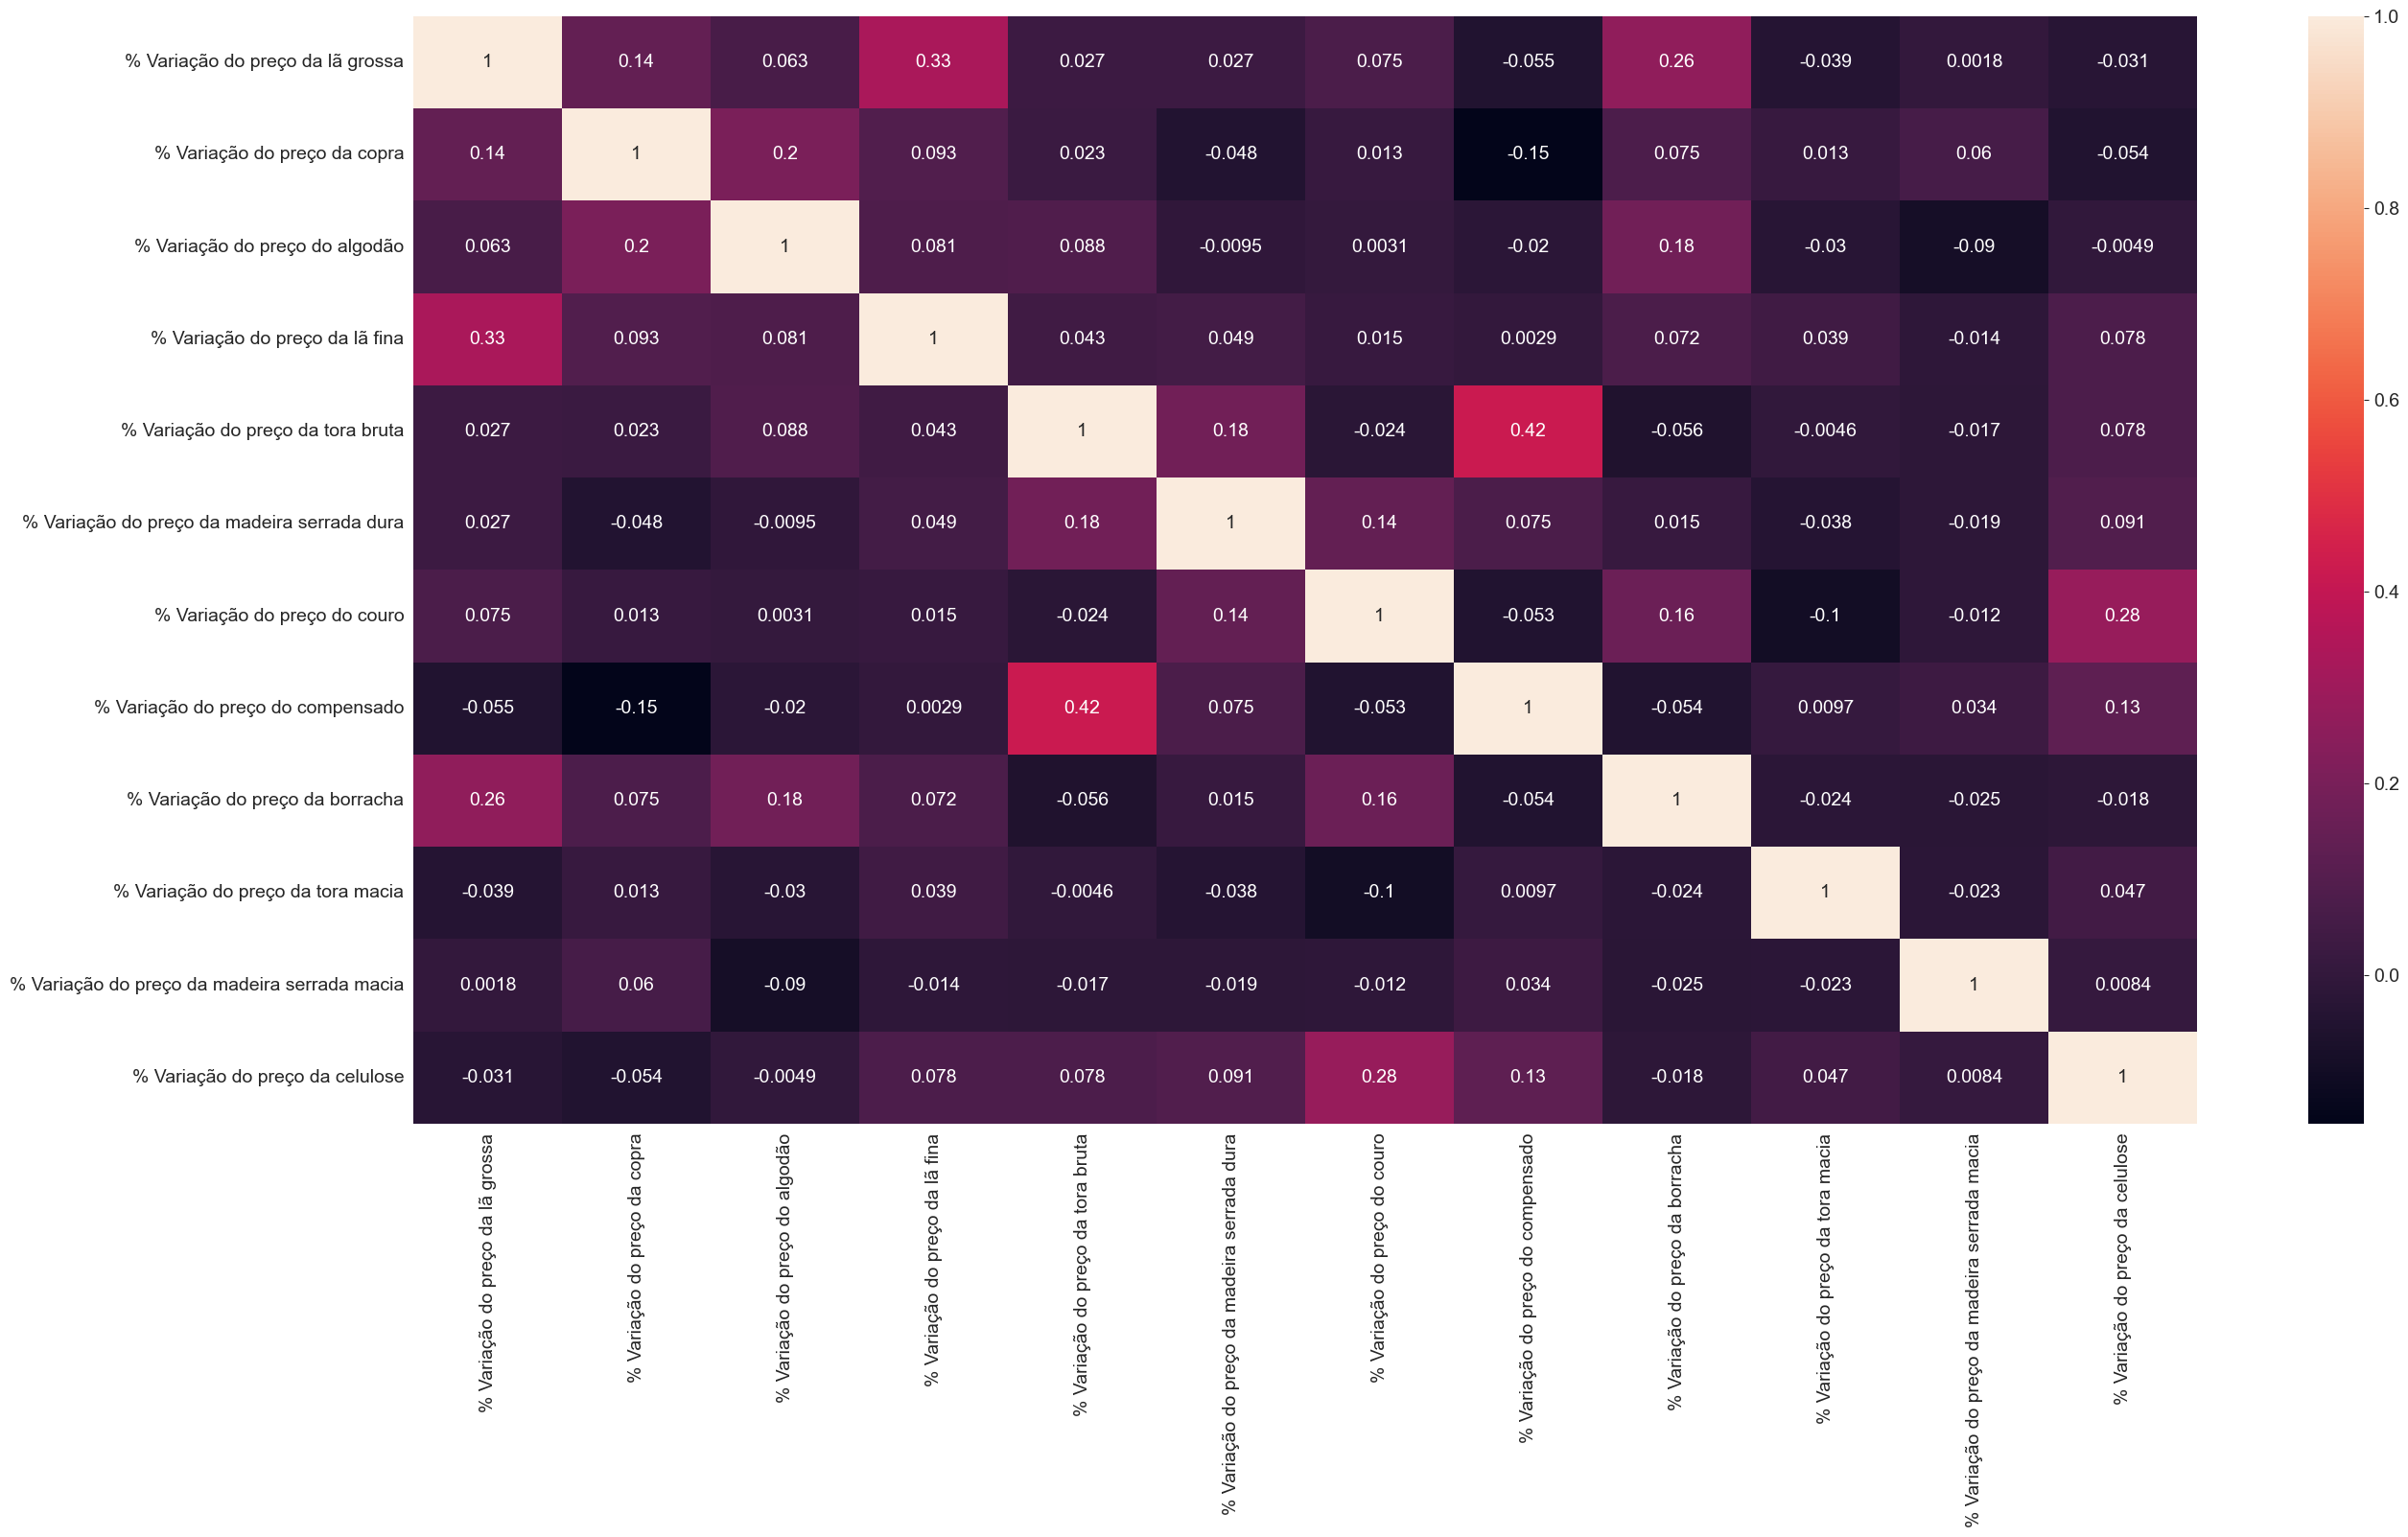

In [11]:
plt.figure(figsize=(30, 15))
lista_de_variacoes = [
    '% Variação do preço da lã grossa',
    '% Variação do preço da copra',
    '% Variação do preço do algodão',
    '% Variação do preço da lã fina',
    '% Variação do preço da tora bruta',
    '% Variação do preço da madeira serrada dura',
    '% Variação do preço do couro',
    '% Variação do preço do compensado',
    '% Variação do preço da borracha',
    '% Variação do preço da tora macia',
    '% Variação do preço da madeira serrada macia',
    '% Variação do preço da celulose'
]   

corrMatrix = base_dados[lista_de_variacoes].corr() #obter a correlação matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()


#Há muitas correlações negativas entre as variações de preços, ou seja, quando a viração A aumenta, a variação B diminui.
#podemos conlcuir que há poucas correlações positivas entre as variações de preços, ou seja, muitas quedas ou aumentos na maioria das vezes estão correlaciondos inversamente/negativamente entre outras variações
#há muitas correlações proximas de 0, ou seja, muitas correlação de variação de preços não estão correlacionadas entre si.

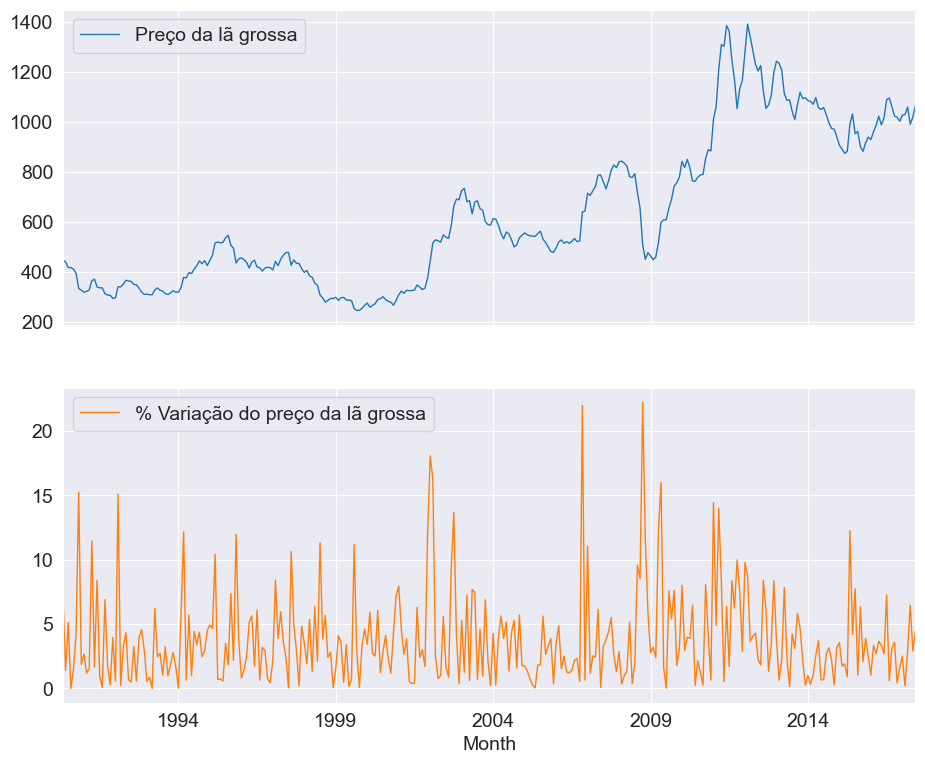

In [13]:
axes=base_dados[['Preço da lã grossa', '% Variação do preço da lã grossa']].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Fazendo e respondendo perguntas
# Q1: Descubra a variação normal do preço da cada matéria-prima

Podemos obsevar que a maioria das matérias primas tem % de mudança de preço inferior a 5%


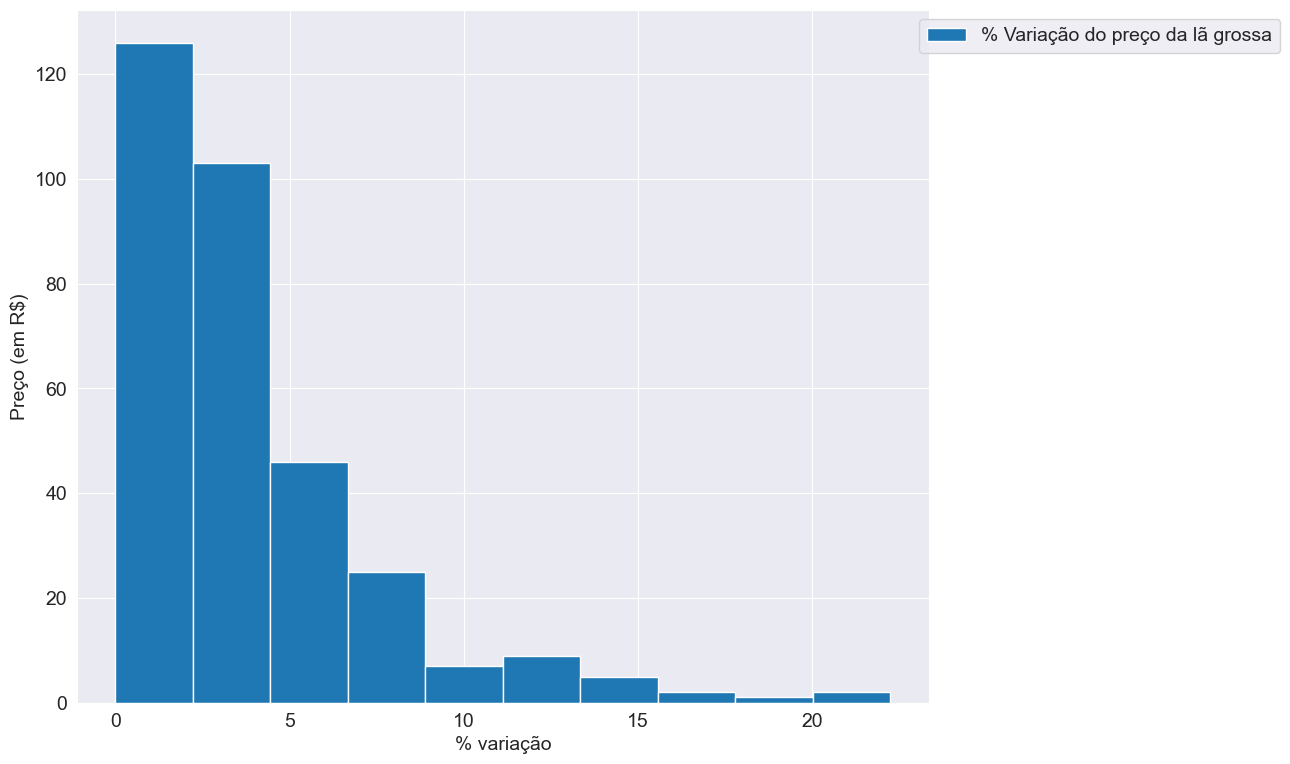

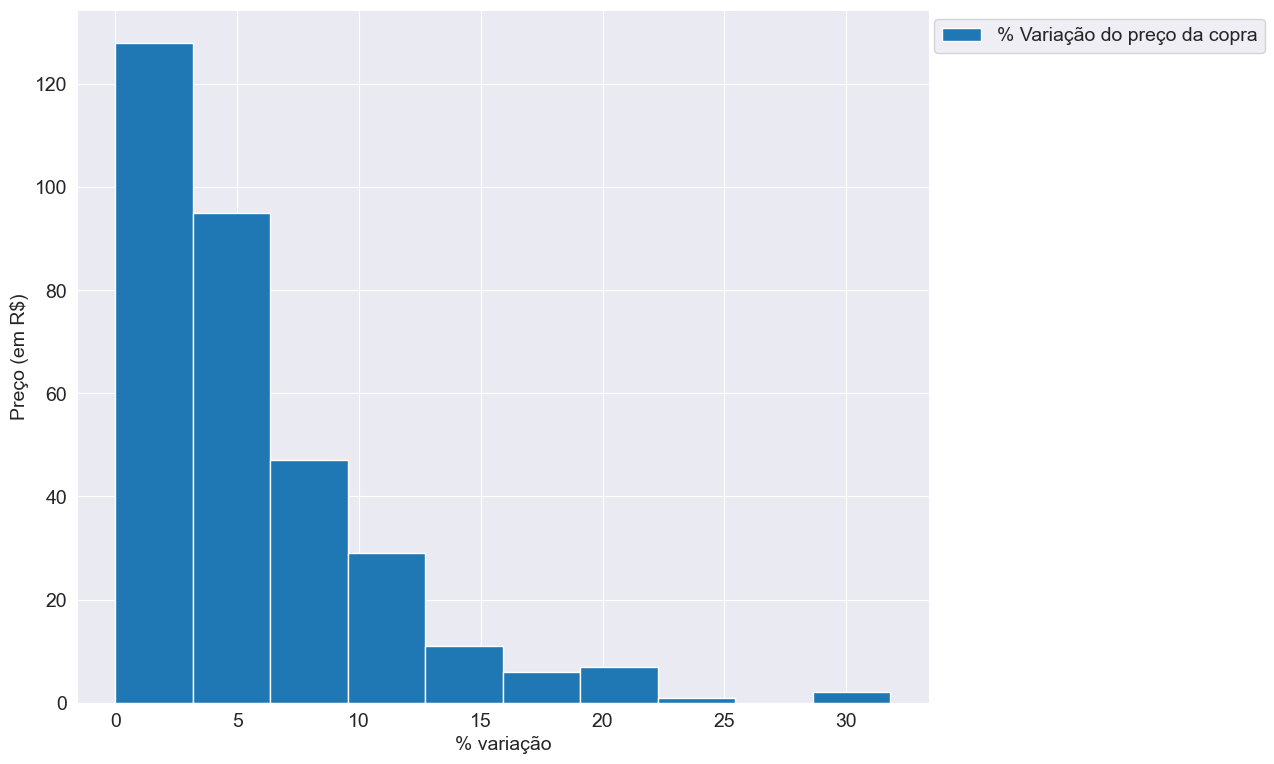

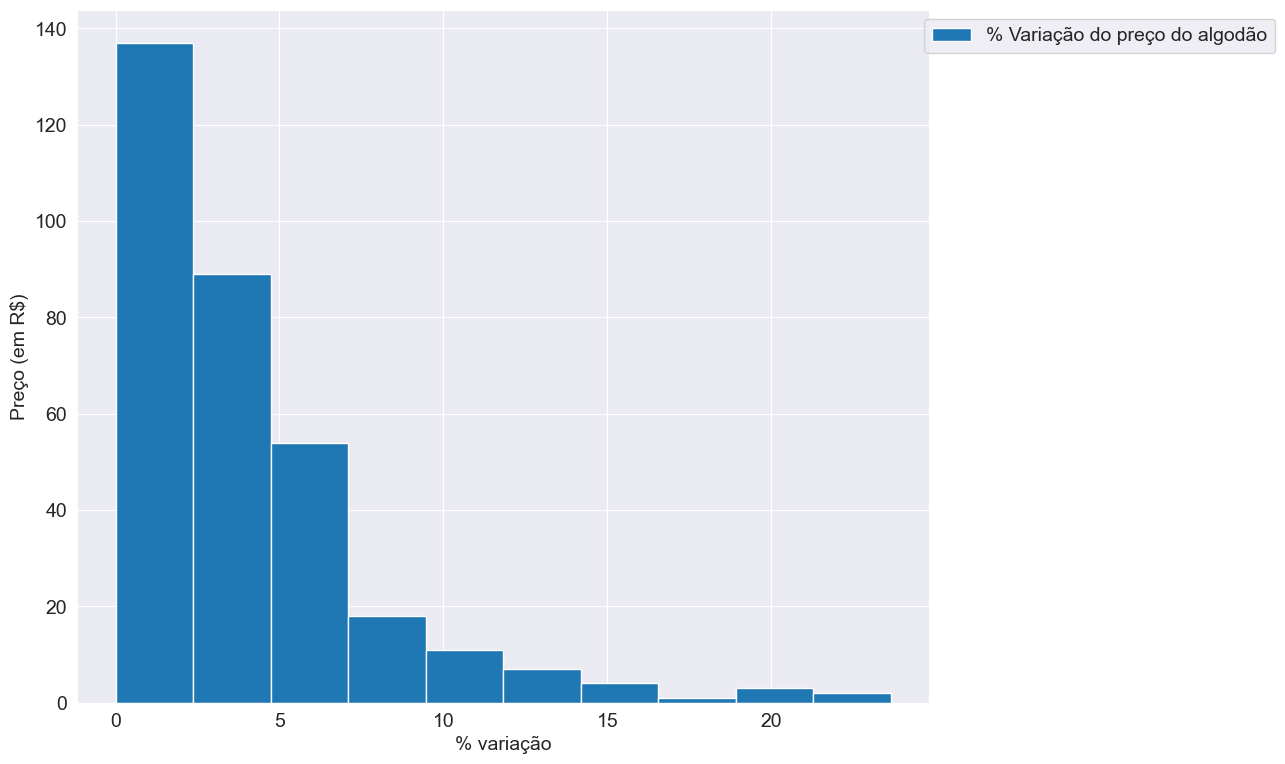

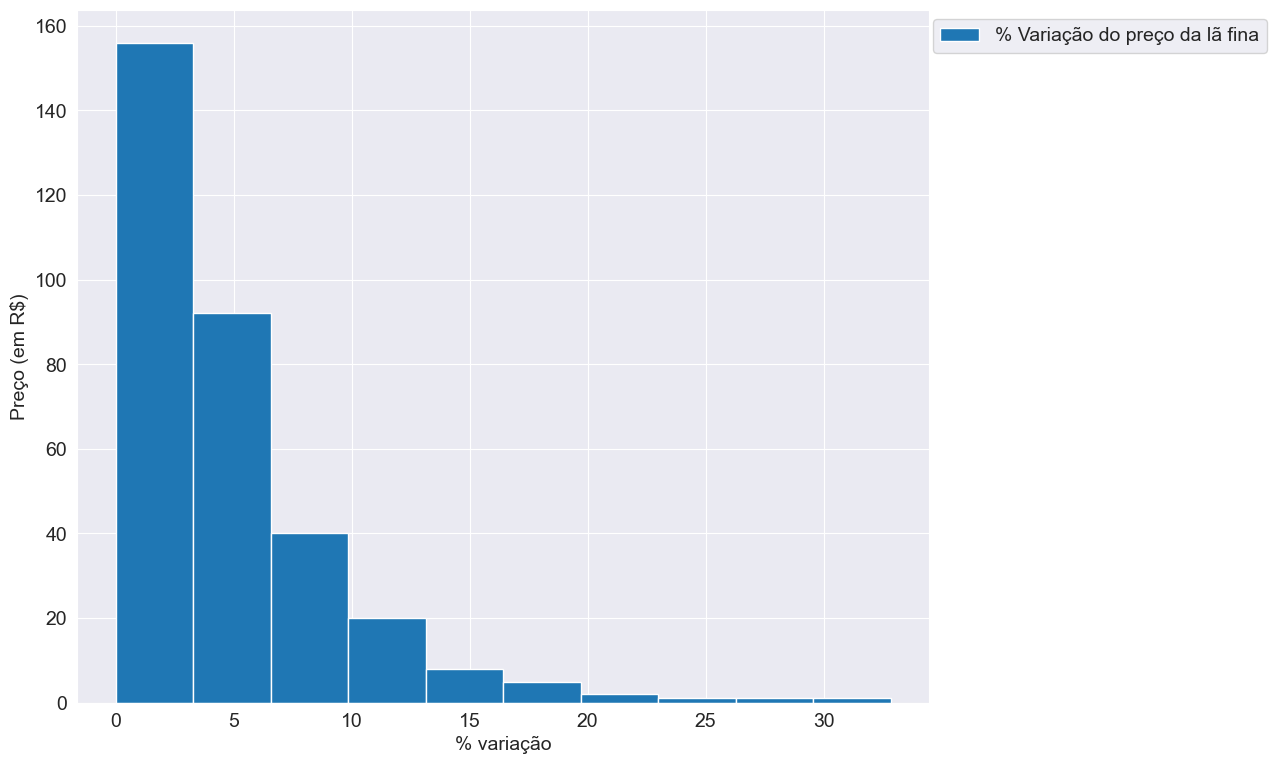

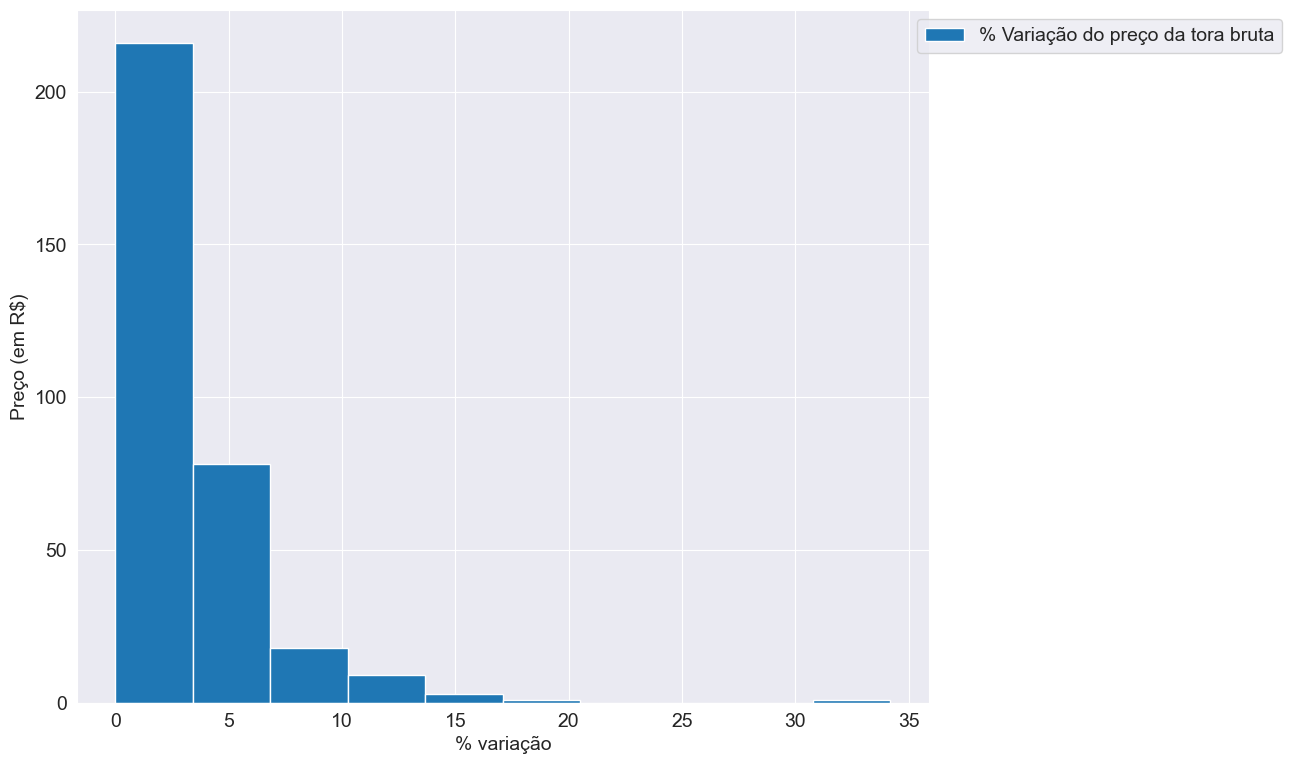

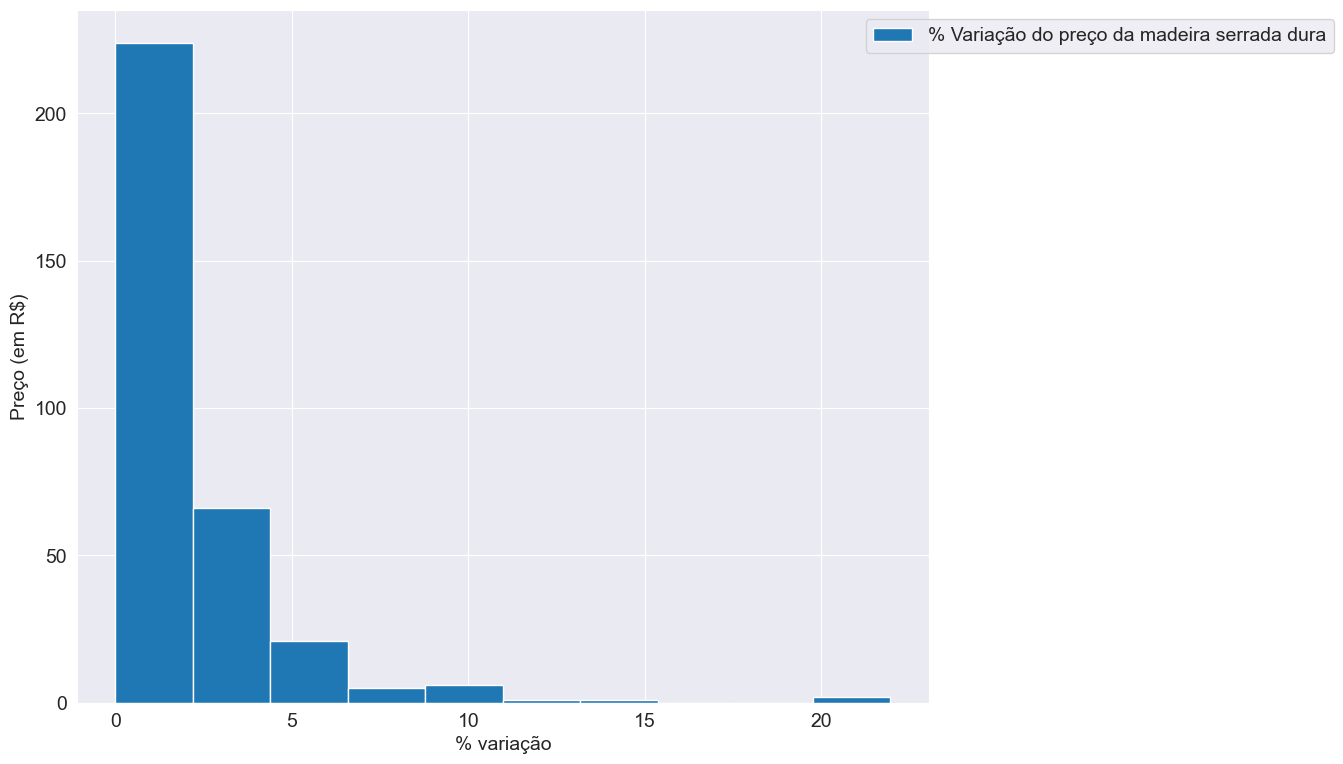

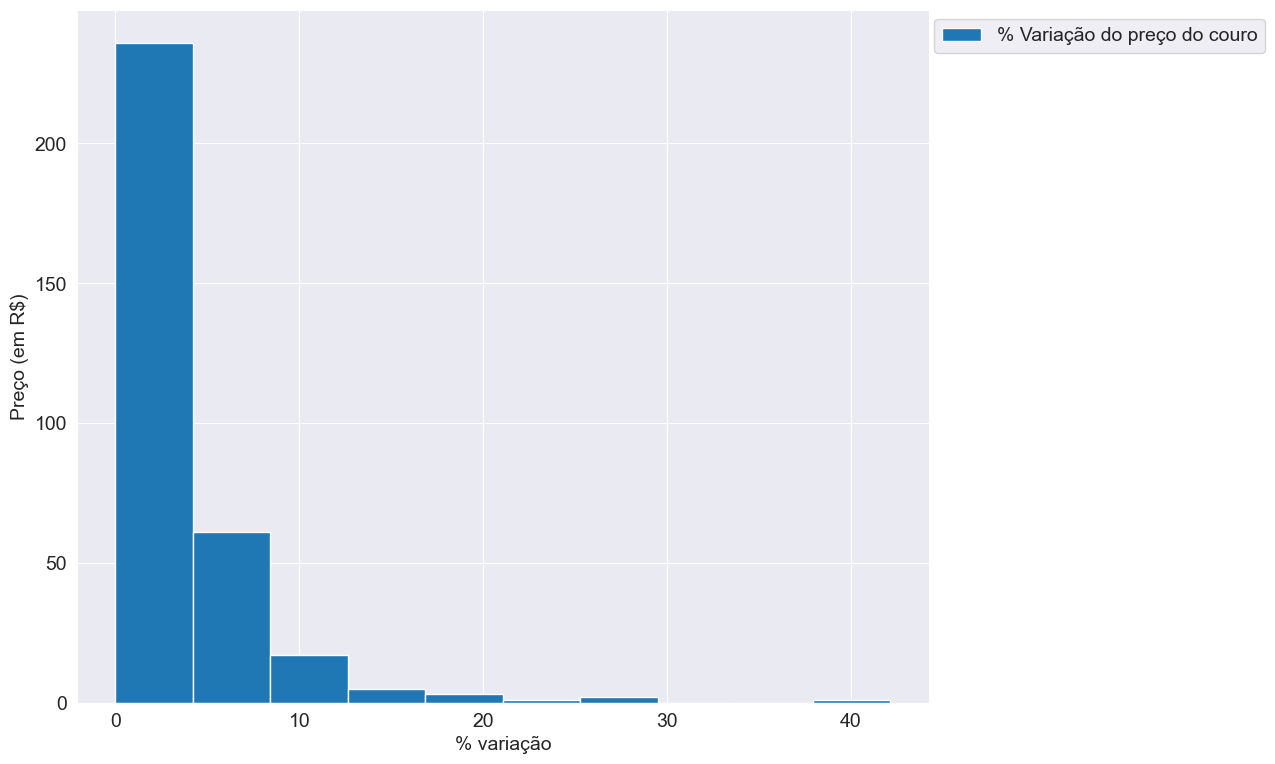

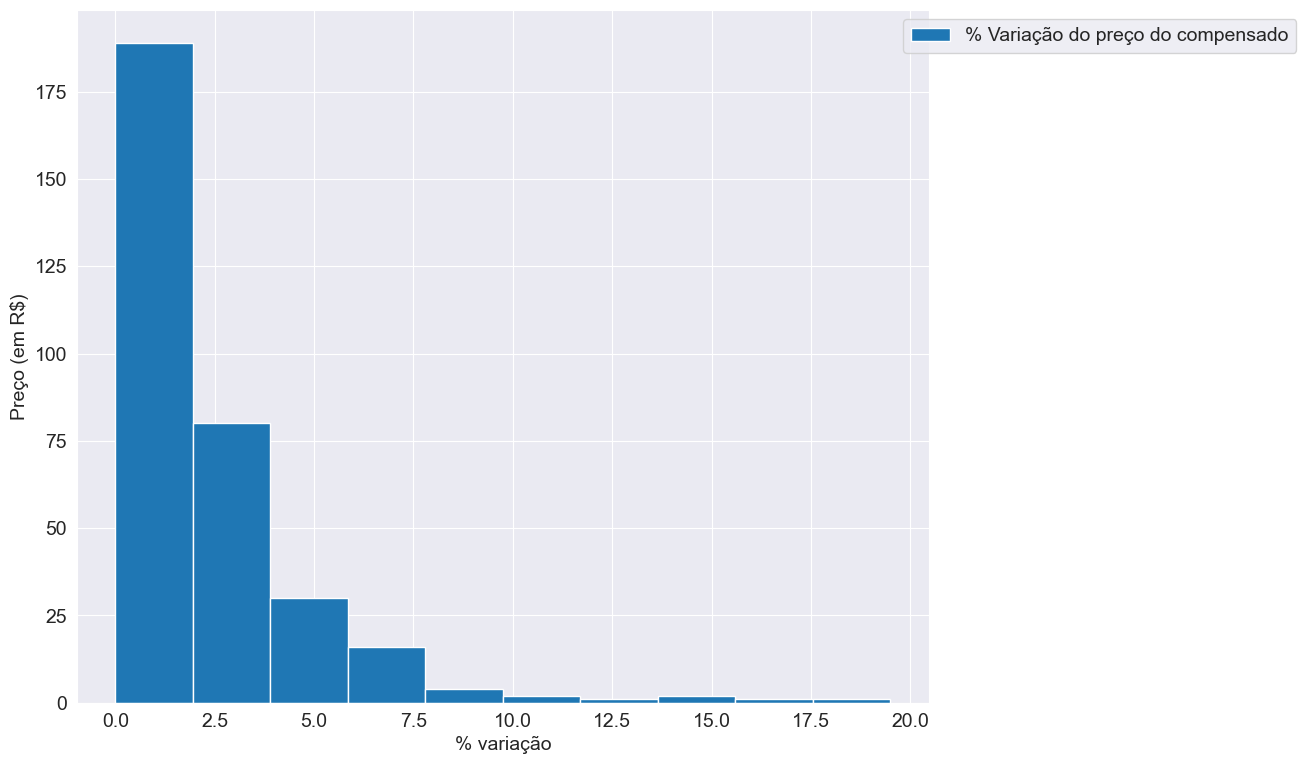

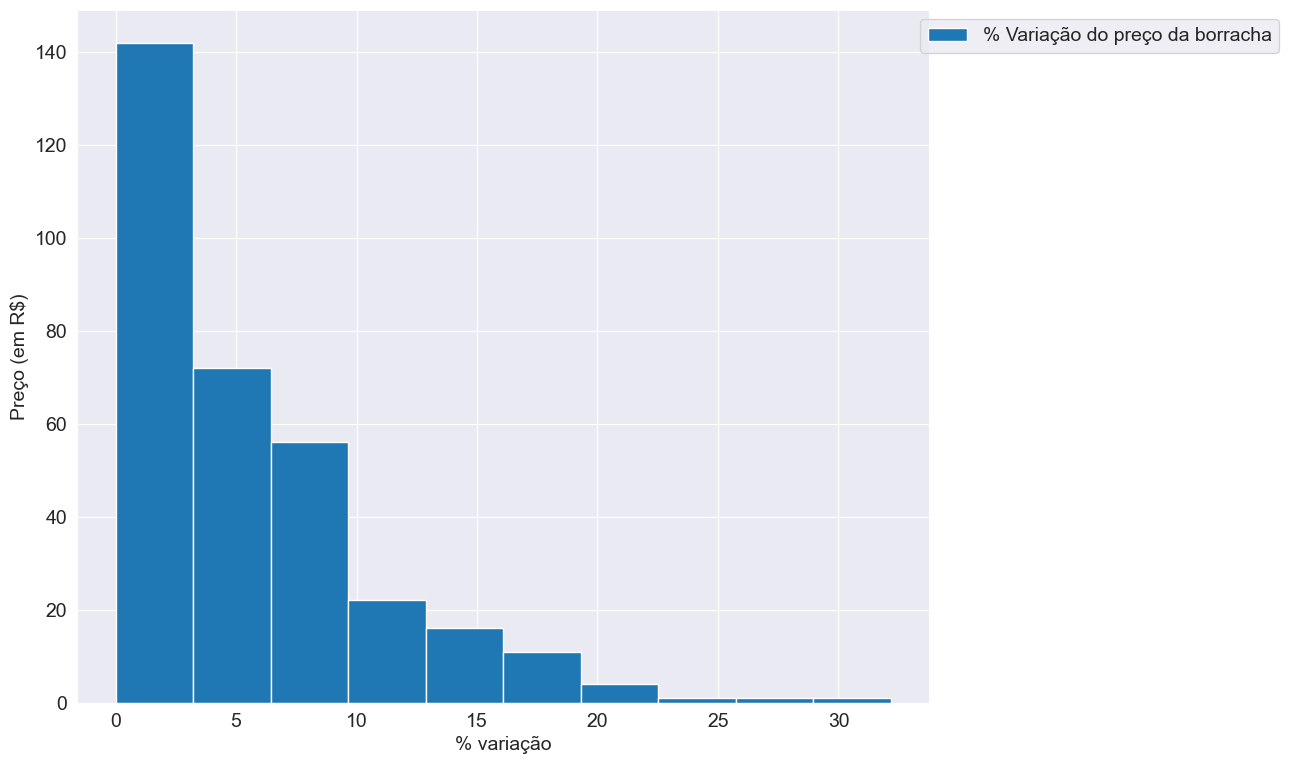

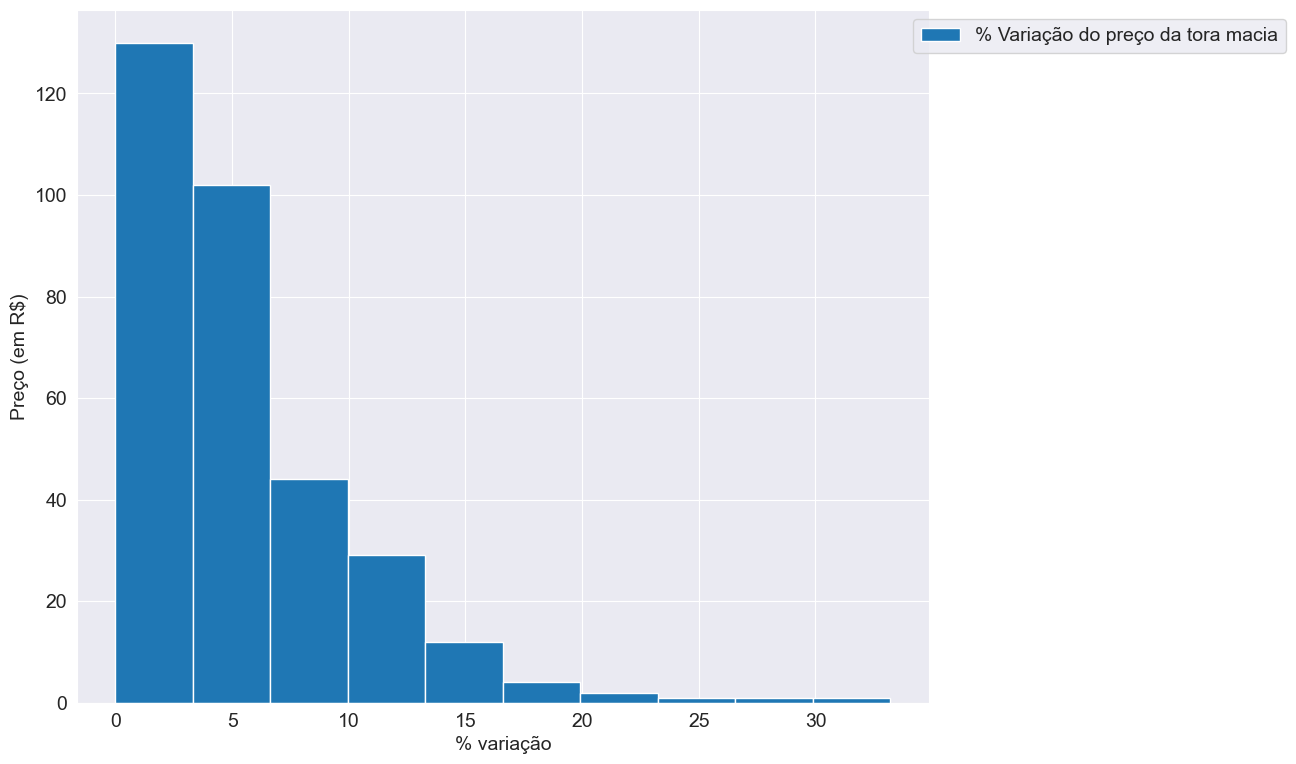

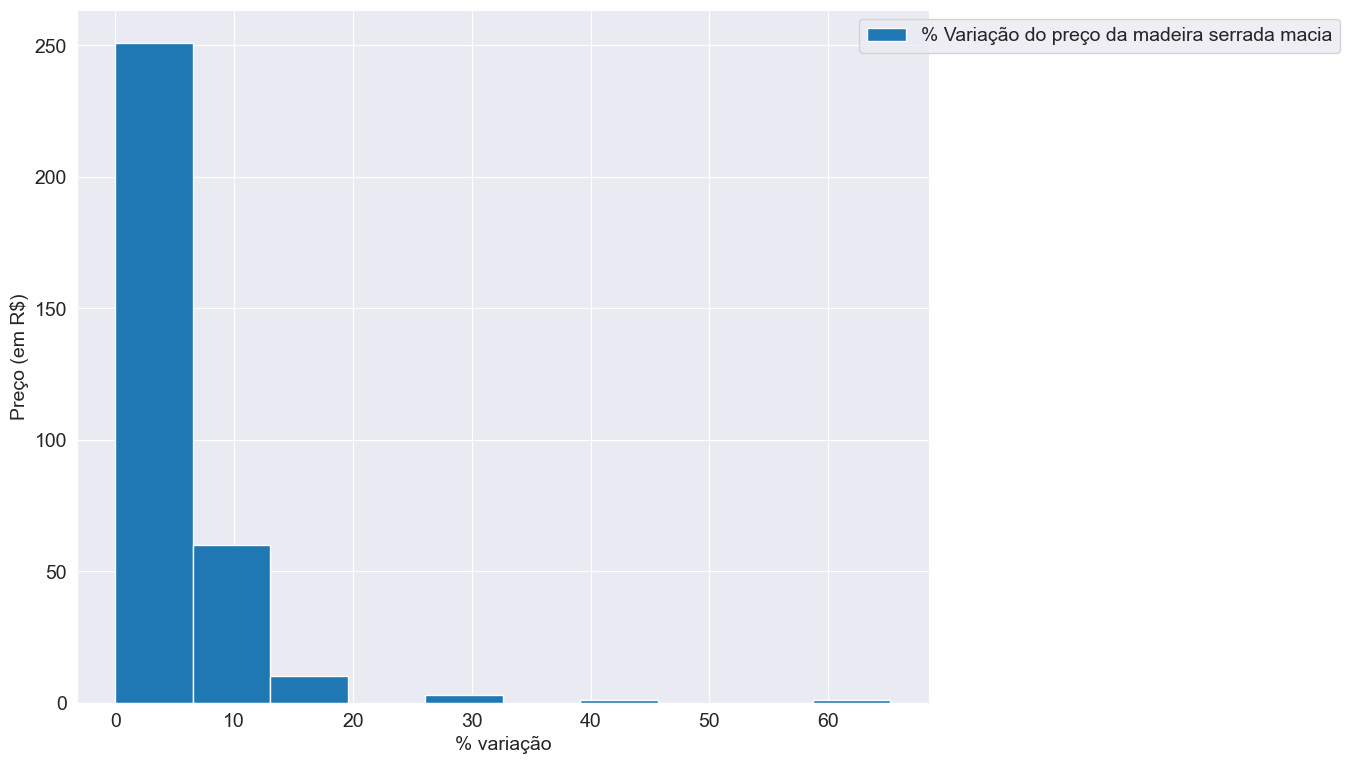

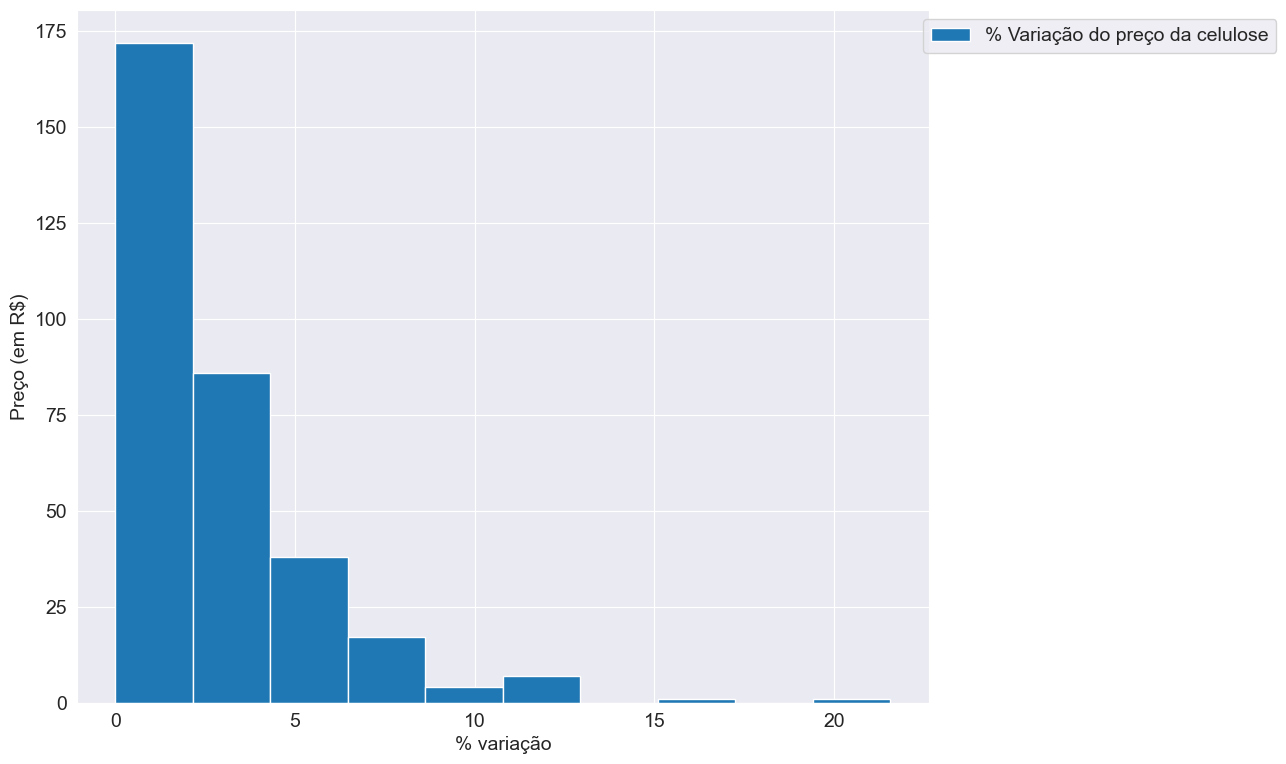

In [18]:
for i in range(len(lista_de_variacoes)):
    plt.figure(figsize=(12, 12))
    base_dados[lista_de_variacoes[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% variação')
    plt.ylabel('Preço (em R$)')
    plt.legend(lista_de_variacoes[i:], loc='upper center', bbox_to_anchor=(1.2,1))



print('Podemos obsevar que a maioria das matérias primas tem % de mudança de preço inferior a 5%')

#A variação de preço da matéria prima madeira serrada macia sofreu poucas variações de preço, ou seja, a variação de preço da madeira serrada macia é mais estável em relação as outras variações de preço.
#A variação de preço da copra sofreu muitas variações de preço, ou seja, a variação de preço da copra é mais instável em relação as outras variações de preço.

# Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos

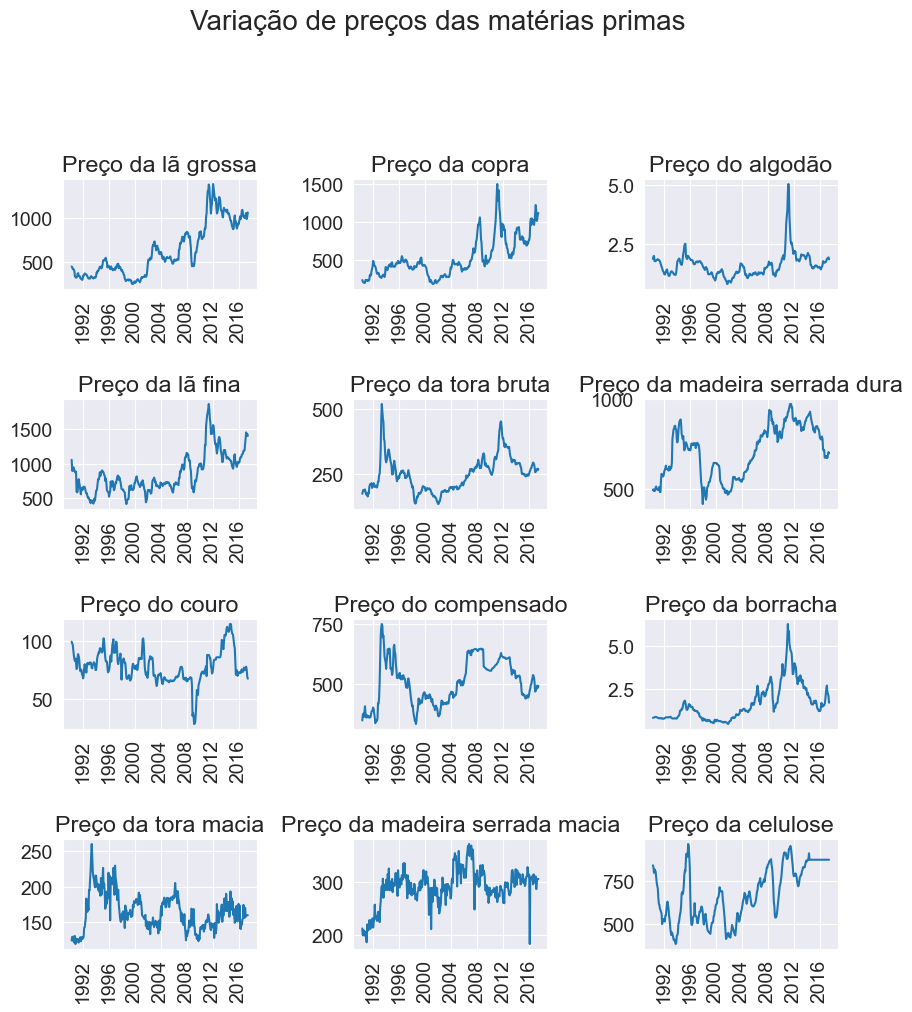

In [23]:
plt.figure(figsize=(10, 10))
for i in  range(len(lista_dados)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(lista_dados[i])
    plt.plot(base_dados[lista_dados[i]])
    plt.xticks(rotation=90)
plt.suptitle('Variação de preços das matérias primas', fontsize=20, y=1.05);






### podemos analisar que o algodão e a borracha possui um preço baixo em relação as outras matérias primas, vamos comparar preços para entender melhor qual é o mais baixo

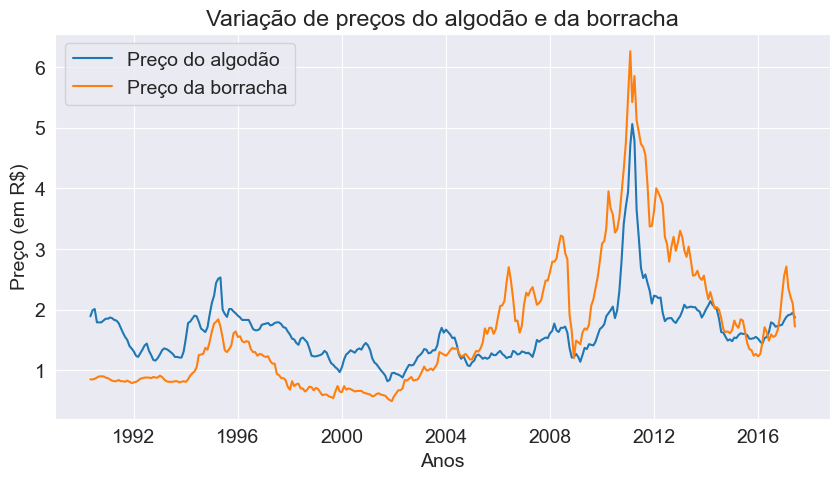

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(base_dados[['Preço do algodão', 'Preço da borracha']])
plt.title('Variação de preços do algodão e da borracha')
plt.xlabel('Anos')
plt.ylabel('Preço (em R$)')
plt.legend(['Preço do algodão', 'Preço da borracha'], loc='upper left');


### o Algodão é a matéria prima de menor preço no últimos anos.
### Tanto o algodão quanto a borracha são materiais de baixo preço

## Q3: Qual é a matéria prima tem a maior e menor variação de % de preço ?

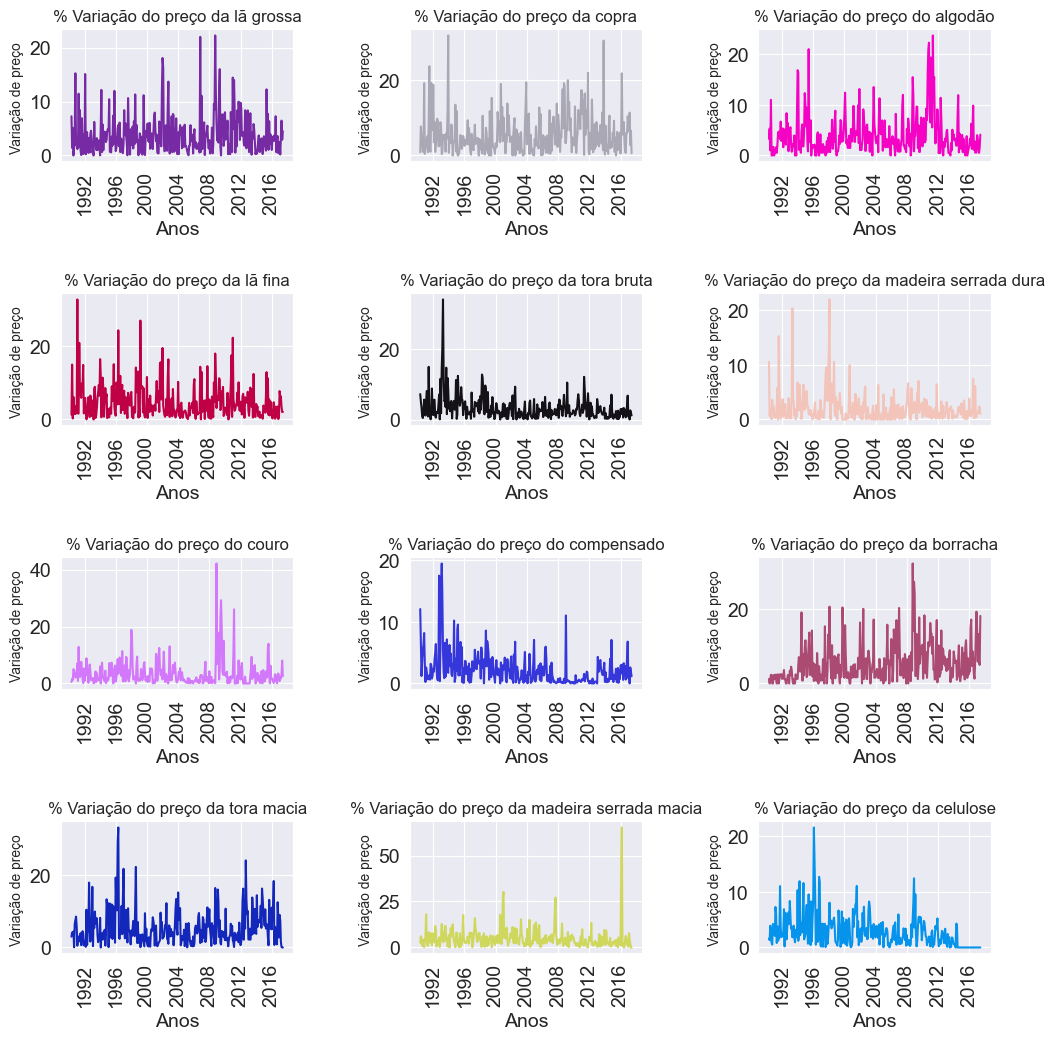

In [38]:
import random as random # gerar cores aleatórias



plt.figure(figsize=(12, 12))
for i in range(len(lista_de_variacoes)):

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.plot(base_dados[lista_de_variacoes[i]], c=color)
    plt.xticks(rotation=90)
    plt.title(lista_de_variacoes[i], fontsize=12)
    plt.xlabel('Anos')
    plt.ylabel('Variação de preço ', fontsize=10)



### Podemos analisar que a matéria prima serrada macia obteve uma variação de preço que superou os 50% no ano de 2016
### A matéria prima com a menor variação de preço vai para o compensado(madeira compensado) em menor de 20%

## Q4: Encontre as matérias-primas com mudança drástica de preço

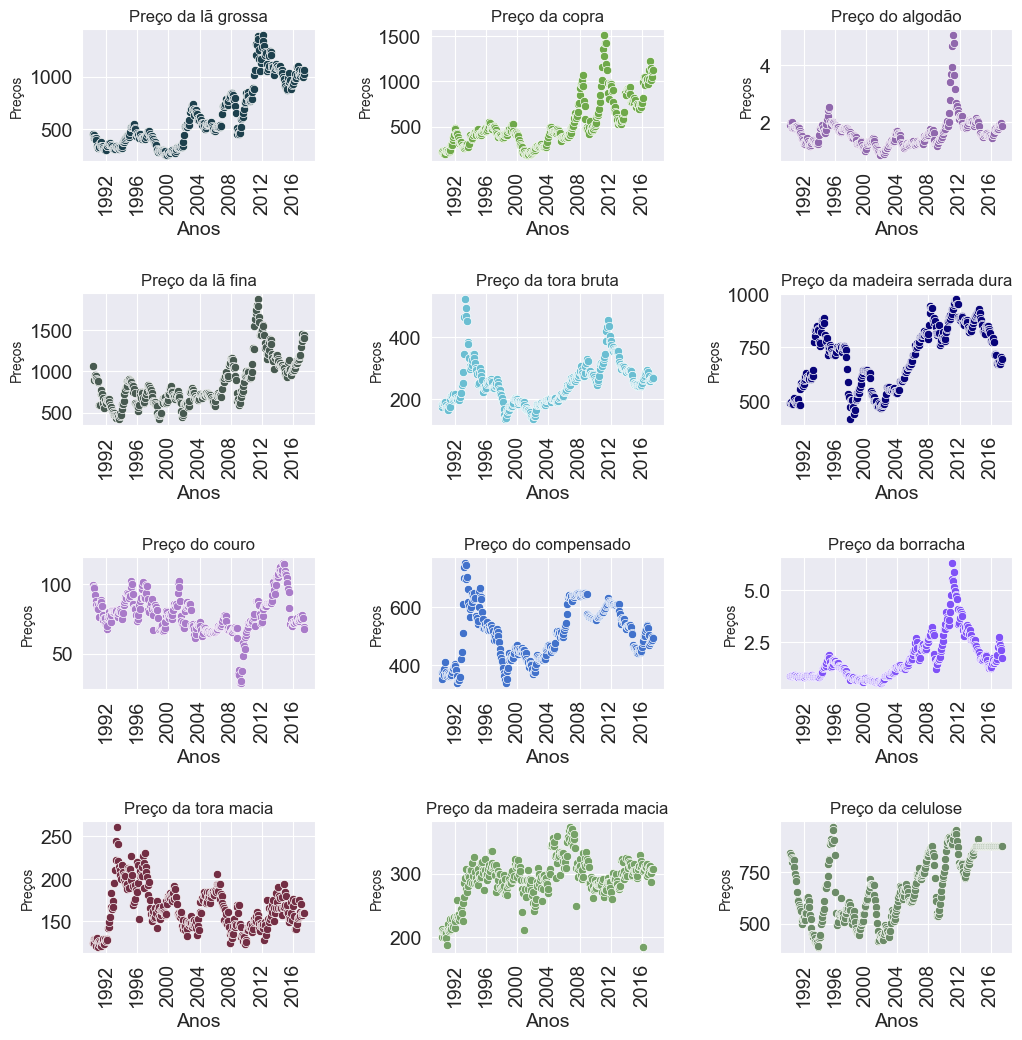

In [43]:
plt.figure(figsize=(12, 12))





for i in range(len(lista_dados)):

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.scatterplot(y=base_dados[lista_dados[i]], x=base_dados.index, color=color)
    plt.xticks(rotation=90)
    plt.title(lista_dados[i], fontsize=12)
    plt.xlabel('Anos')
    plt.ylabel('Preços', fontsize=10);

### A mudança de preço é drástica para o o preço da matéria-prima tora bruta, algodão, borracha entre os materiais de baixa faixa de preço.
### E entre materiais de alto preço, é a matéria-prima lã fina, lã grossa e copra.

## Q5: Descobrir a faixa de preço de matérias-primas de baixo preço

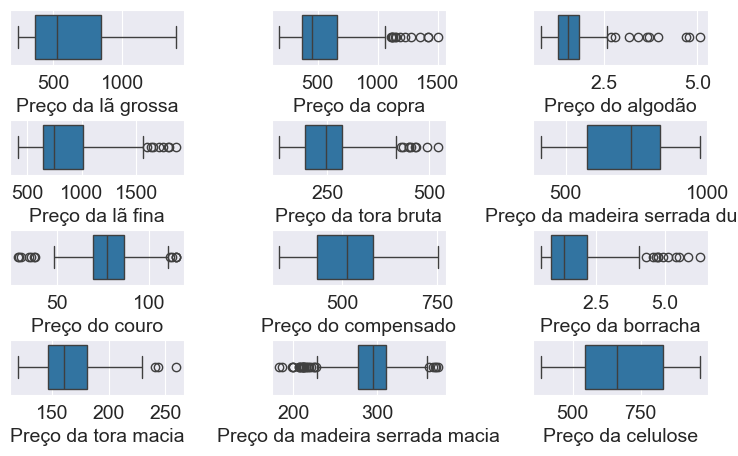

In [48]:
for i in range(len(lista_dados)):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.boxplot(x=base_dados[lista_dados[i]])
